In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [16]:
word_index= imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [17]:
decoded_review = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [18]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [25]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for (i, sequence) in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [41]:
x_val = x_train[:10000]
partial_x_val = x_train[10000:]
y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [42]:
history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 8s 537us/step - loss: 0.5465 - binary_accuracy: 0.7057 - val_loss: 0.3983 - val_binary_accuracy: 0.8252
Epoch 2/20
15000/15000 [==============================] - 4s 268us/step - loss: 0.2940 - binary_accuracy: 0.8831 - val_loss: 0.3280 - val_binary_accuracy: 0.8702
Epoch 3/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1982 - binary_accuracy: 0.9225 - val_loss: 0.3222 - val_binary_accuracy: 0.8810
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1458 - binary_accuracy: 0.9421 - val_loss: 0.3349 - val_binary_accuracy: 0.8826
Epoch 5/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1199 - binary_accuracy: 0.9555 - val_loss: 0.4042 - val_binary_accuracy: 0.8686
Epoch 6/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.0877 - binary_accuracy: 0.9719 - val_loss: 0.4576 

In [45]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

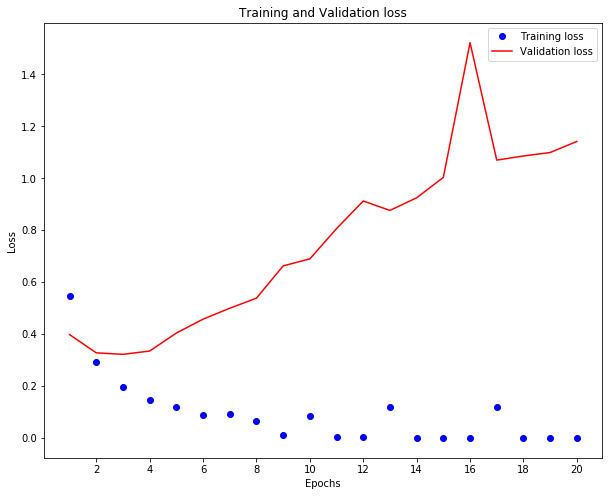

In [54]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.xticks(range(0,21,2))
plt.plot(epochs,loss_values,'bo',label="Training loss")
plt.plot(epochs,val_loss_values,'r',label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

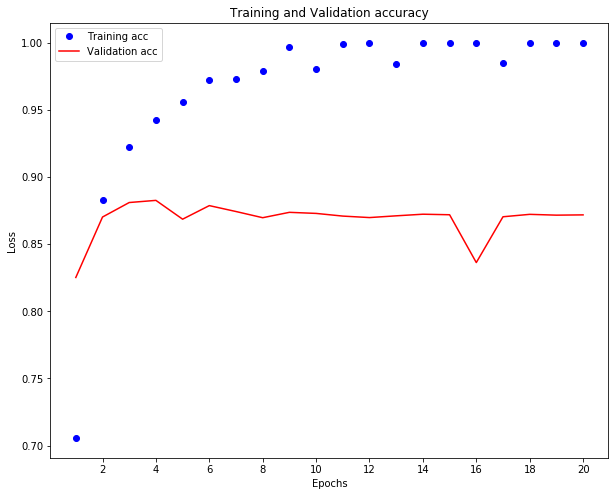

In [56]:
import matplotlib.pyplot as plt


binary_accuracy = history_dict['binary_accuracy']
val_binary_accuracy = history_dict['val_binary_accuracy']
epochs = range(1,len(val_binary_accuracy)+1)

plt.figure(figsize=(10,8))
plt.xticks(range(0,len(val_binary_accuracy)+1,2))
plt.plot(epochs,binary_accuracy,'bo',label="Training acc")
plt.plot(epochs,val_binary_accuracy,'r',label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

model.fit(partial_x_val, partial_y_val, epochs=4, batch_size=512)

Epoch 1/4
15000/15000 [==============================] - 6s 391us/step - loss: 0.5326 - acc: 0.7917
Epoch 2/4
15000/15000 [==============================] - 2s 133us/step - loss: 0.3258 - acc: 0.8987
Epoch 3/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.2357 - acc: 0.9247
Epoch 4/4
15000/15000 [==============================] - 1s 98us/step - loss: 0.1867 - acc: 0.9395


In [58]:
results= model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 6s 250us/step


In [59]:
results

[0.3012486324977875, 0.87736]

In [74]:
y_pred = model.predict(x_test)
y_test_t = np.array([[y] for y in y_test])
y_score =y_pred-y_test_t
plt.hist(y_score)

(array([  232.,   423.,   714.,  1529., 10100.,  7393.,  1874.,  1172.,
          834.,   729.]),
 array([-0.996755  , -0.79708225, -0.5974094 , -0.39773667, -0.19806388,
         0.00160891,  0.2012817 ,  0.40095448,  0.60062724,  0.80030006,
         0.9999728 ], dtype=float32),
 <a list of 10 Patch objects>)

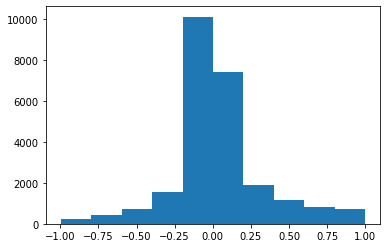

In [112]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.mse,
              metrics=['accuracy'])

In [113]:
history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 453us/step - loss: 0.1495 - acc: 0.7825 - val_loss: 0.1047 - val_acc: 0.8592
Epoch 2/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.0674 - acc: 0.9138 - val_loss: 0.0847 - val_acc: 0.8864
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0498 - acc: 0.9353 - val_loss: 0.0873 - val_acc: 0.8848
Epoch 4/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0372 - acc: 0.9539 - val_loss: 0.1051 - val_acc: 0.8658
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0298 - acc: 0.9642 - val_loss: 0.0990 - val_acc: 0.8775
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.0253 - acc: 0.9699 - val_loss: 0.1002 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0221 - acc: 0.9745 - val_loss: 0.1251 - 

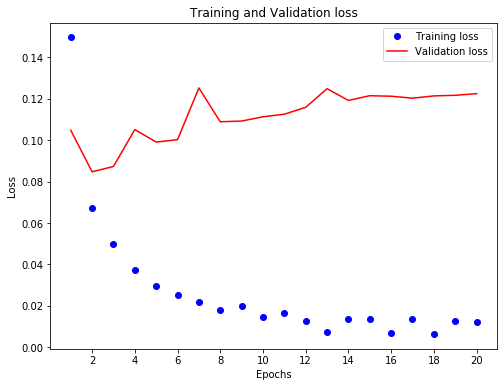

In [114]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(8, 6))
plt.xticks(range(0, 21, 2))
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

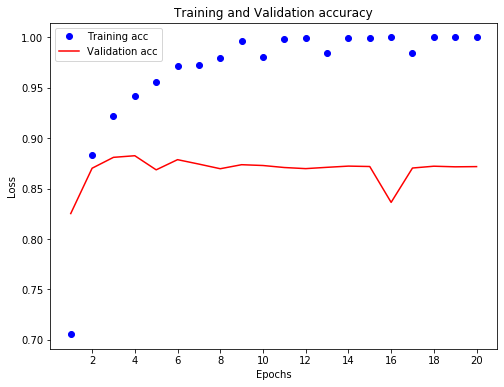

In [115]:
import matplotlib.pyplot as plt


acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1,len(val_acc)+1)

plt.figure(figsize=(8,6))
plt.xticks(range(0,len(val_acc)+1,2))
plt.plot(epochs,binary_accuracy,'bo',label="Training acc")
plt.plot(epochs,val_binary_accuracy,'r',label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [116]:
model.fit(partial_x_val, partial_y_val, epochs=2, batch_size=512)
results= model.evaluate(x_test,y_test)
results

Epoch 1/2
15000/15000 [==============================] - 3s 168us/step - loss: 0.0057 - acc: 0.9943
Epoch 2/2
25000/25000 [==============================] - 6s 233us/step


[0.1363924667649716, 0.8512]

(array([ 1646.,   171.,   126.,   180., 10377., 10408.,   173.,   143.,
          158.,  1618.]),
 array([-9.9990427e-01, -7.9992330e-01, -5.9994233e-01, -3.9996135e-01,
        -1.9998038e-01,  5.9604645e-07,  1.9998157e-01,  3.9996254e-01,
         5.9994352e-01,  7.9992449e-01,  9.9990547e-01], dtype=float32),
 <a list of 10 Patch objects>)

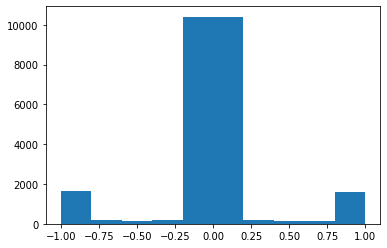

In [117]:
y_pred = model.predict(x_test)
y_test_t = np.array([[y] for y in y_test])
y_score =(y_pred-y_test_t)
plt.hist(y_score)